In [3]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split #splits data for training and testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

2024-03-15 00:39:43.156772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 00:39:43.156922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 00:39:43.327277: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
file_path = '/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'

In [5]:
name_class = os.listdir(file_path)
name_class

['Tecoma',
 'Malabar_Nut',
 'Curry',
 'Drumstick',
 'Tomato',
 'Lemongrass',
 'Ginger',
 'Chilly',
 'Nelavembu',
 'Raddish',
 'Nooni',
 'Jackfruit',
 'Turmeric',
 'Palak(Spinach)',
 'Honge',
 'Mint',
 'Pumpkin',
 'Lantana',
 'Jasmine',
 'Castor',
 'Papaya',
 'Sapota',
 'Kambajala',
 'Kasambruga',
 'Badipala',
 'Neem',
 'Guava',
 'Bringaraja',
 'kamakasturi',
 'Coriender',
 'Coffee',
 'ashoka',
 'Tulsi',
 'Pea',
 'Seethapala',
 'Caricature',
 'Citron lime (herelikai)',
 'Catharanthus',
 'Astma_weed',
 'Pepper',
 'Balloon_Vine',
 'Hibiscus',
 'Bhrami',
 'Pomoegranate',
 'Aloevera',
 'Chakte',
 'Eucalyptus',
 'Beans',
 'Insulin',
 'camphor',
 'Padri',
 'Parijatha',
 'Marigold',
 'Taro',
 'Spinach1',
 'Bamboo',
 'Amla',
 'Arali',
 'kepala',
 'Globe Amarnath',
 'Ganigale',
 'Lemon',
 'Common rue(naagdalli)',
 'Ekka',
 'Betel',
 'Tamarind',
 'Henna',
 'Gasagase',
 'Doddpathre',
 'Malabar_Spinach',
 'Rose',
 'Amruthaballi',
 'Kohlrabi',
 'Nerale',
 'Mango',
 'Onion',
 'Thumbe',
 'Sampige',
 '

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


In [8]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,/kaggle/input/indian-medicinal-leaves-dataset/...,Hibiscus
1,/kaggle/input/indian-medicinal-leaves-dataset/...,Tulsi
2,/kaggle/input/indian-medicinal-leaves-dataset/...,Chakte
3,/kaggle/input/indian-medicinal-leaves-dataset/...,Taro
4,/kaggle/input/indian-medicinal-leaves-dataset/...,Lemon


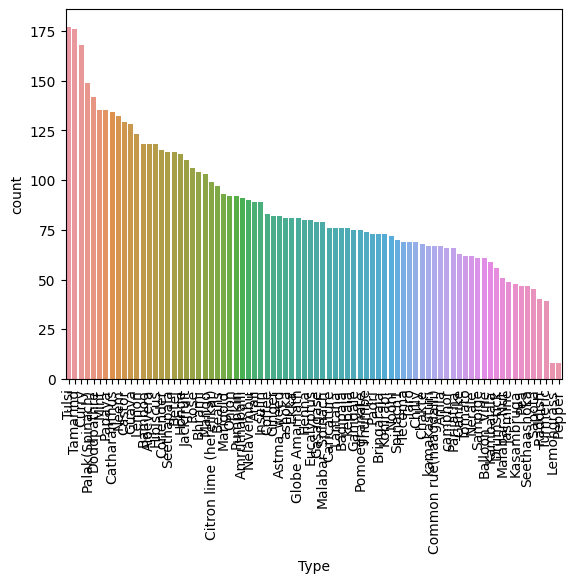

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

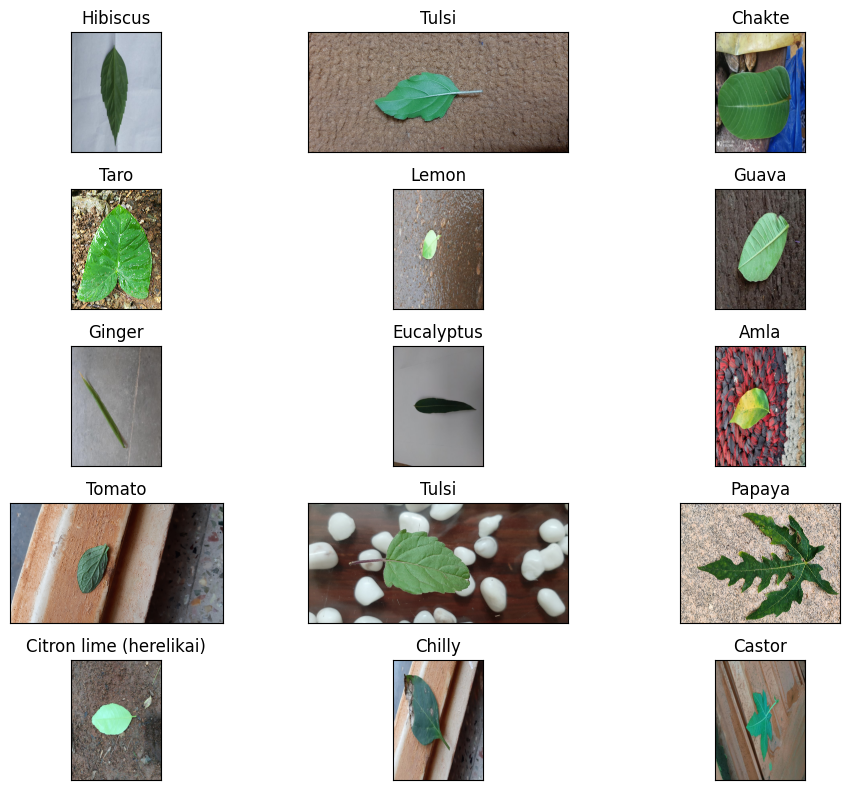

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [12]:
train_datagen =ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen =ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5174 validated image filenames belonging to 80 classes.
Found 5174 validated image filenames belonging to 80 classes.
Found 5174 validated image filenames belonging to 80 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [14]:
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(80, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [16]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 1473s 9s/step - accuracy: 0.1115 - loss: 3.9755 - val_accuracy: 0.4571 - val_loss: 2.1656
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1539s 9s/step - accuracy: 0.5157 - loss: 1.8721 - val_accuracy: 0.6774 - val_loss: 1.1845
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1544s 9s/step - accuracy: 0.6924 - loss: 1.1330 - val_accuracy: 0.7640 - val_loss: 0.8369
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1456s 9s/step - accuracy: 0.7649 - loss: 0.8091 - val_accuracy: 0.8365 - val_loss: 0.5876
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1445s 9s/step - accuracy: 0.8304 - loss: 0.5881 - val_accuracy: 0.8610 - val_loss: 0.4732
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1397s 9s/step - accuracy: 0.8633 - loss: 0.4650 - val_accuracy: 0.8775 - val_loss: 0.4256
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1402s 9s/step - accuracy: 0.8874 - loss: 0.3921 - val_accuracy: 0.8823 - val_loss: 0.3807
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1426s 9s/step - accuracy: 0.9013 - loss: 0.3261 - val_accurac

In [19]:
model.save("model_resnet50.h5")  

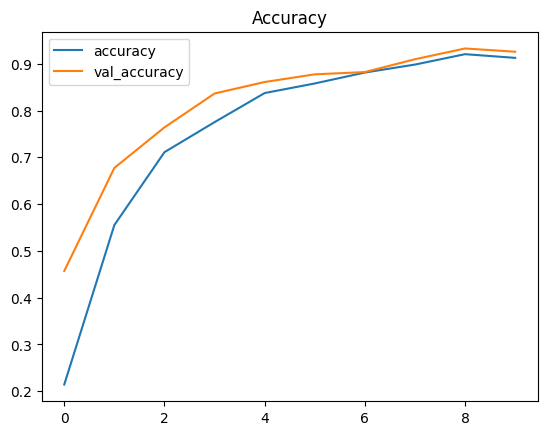

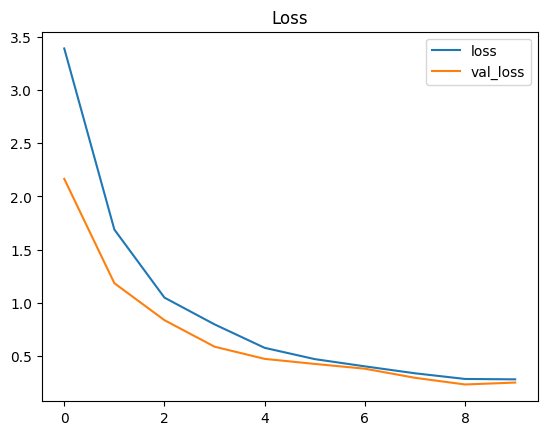

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [21]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


    Test Loss: 0.24619
Test Accuracy: 92.77%


In [33]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (test_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


162/162 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step


In [43]:
y_test = list(train.Label)
print(classification_report(y_test[0:1000], pred[0:1000]))

                         precision    recall  f1-score   support

               Aloevera       1.00      1.00      1.00        15
                   Amla       1.00      0.91      0.95        11
           Amruthaballi       1.00      0.73      0.85        15
                  Arali       1.00      1.00      1.00        19
             Astma_weed       0.76      0.93      0.84        14
               Badipala       0.91      0.67      0.77        15
           Balloon_Vine       1.00      1.00      1.00         7
                 Bamboo       0.94      1.00      0.97        16
                  Beans       0.95      1.00      0.97        18
                  Betel       1.00      1.00      1.00        12
                 Bhrami       1.00      0.91      0.95        11
             Bringaraja       0.79      0.92      0.85        12
             Caricature       1.00      1.00      1.00         8
                 Castor       1.00      0.93      0.97        15
           Catharanthus 

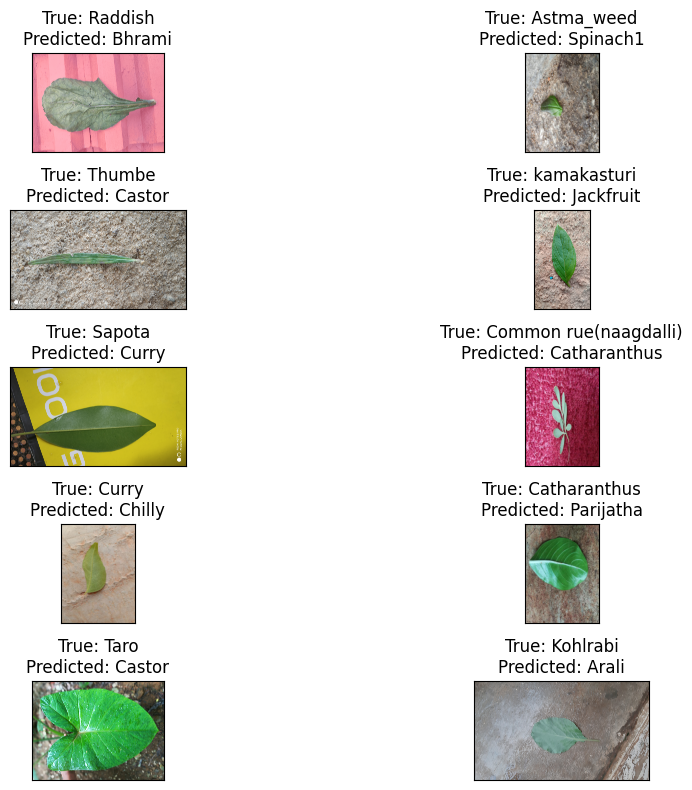

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()